# Automatically calculating number of rays to shoot based on user's desired uncertainty

### Fractional uncertainty: $\delta$

### Number of rays in source plane per pixel of width $dx$:
$n_{source} = \dfrac{\delta^{-2}}{dx^2}$

### This gets transformed into the image plane, where the area of the pixel is scaled up by $A$, the magnification.
### The new number of rays per area in the image plane is:
$n_{image} = \dfrac{\delta^{-2}}{A dx^2}$


### Magnification as a function of seperation from single lens:
$A(u) = \dfrac{u^2 + 2}{u \sqrt{u^2 + 4}}$

In [6]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from IRSMicroLensing import IRSCaustics as IRSC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def A(u):
    return (u**2 + 2) / (u * np.sqrt(u**2 + 4))

Creating mesh grid: 0.208 seconds
Calculating source pixels: 2.373 seconds
Calculating indices of translated pixel after deflection: 0.911 seconds
Calculating translated pixels: 1.33 seconds
Sorting translated pixels: 1.33 seconds
Finding pixel repetitions and counts: 0.603 seconds
Incrementing pixel magnifications based on counts and repetitions: 0.146 seconds
Plotting magnification map: 0.173 seconds
---------------------
Total time: 5.753 seconds


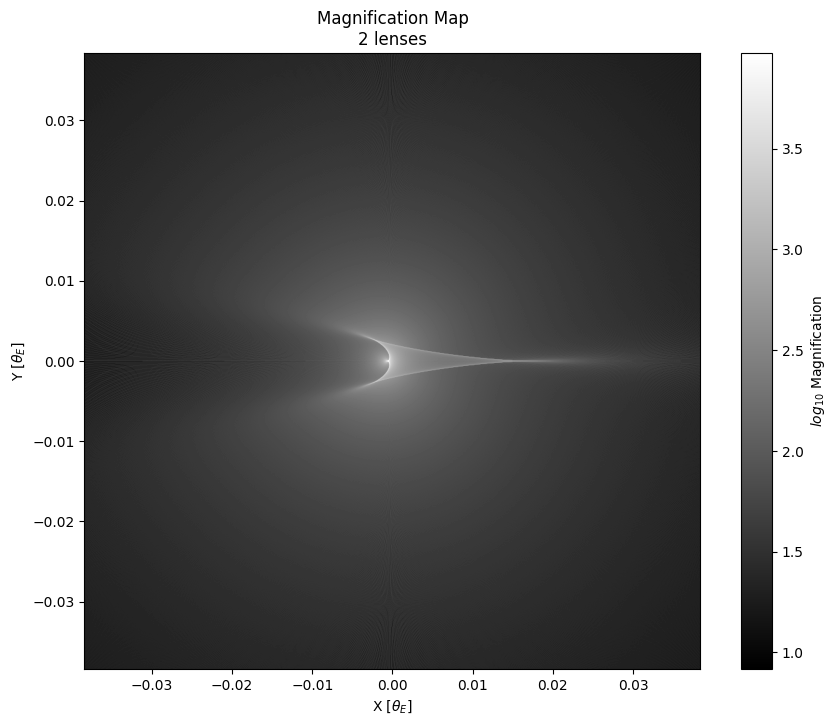

In [8]:
lens_att = [
    [0, 0, 0.01, 1],
    [0.8, 0, 0.01, 1e-3],
    # [0.8, 0.1, 0.01, 1e-6],
]

num_theta_1 = 5000
num_r_1 = 4 * num_theta_1

param_dict_1 = {'pixels': 1000, 'ang_width': 'auto', 'lens_att': lens_att, 'thickness': 'auto', 'num_r': num_r_1, 'num_theta': num_theta_1}
mag_map_1 = IRSC.IRSCaustics(annulus_param_dict=param_dict_1)
magnifications_1 = mag_map_1.plot()

plt.show()

1.0
0.1
Creating mesh grid: 0.15 seconds
Calculating source pixels: 1.721 seconds
Calculating indices of translated pixel after deflection: 0.607 seconds
Calculating translated pixels: 1.031 seconds
Finding pixel repetitions and counts: 1.177 seconds
5.8987310391905815e-09
169537752.56361285
1 169527987.18166664 0.9999423999563605 0.9999423999563605 [0 0]
1 169527987.18166664 0.9999423999563605 1.999884799912721 [0 0]
1 169527987.18166664 0.9999423999563605 2.9998271998690815 [0 0]
1 169527987.18166664 0.9999423999563605 3.999769599825442 [0 0]
1 169527987.18166664 0.9999423999563605 4.999711999781803 [0 0]
1 169527987.18166664 0.9999423999563605 5.999654399738163 [0 0]
1 169527987.18166664 0.9999423999563605 6.999596799694523 [0 0]
1 169527987.18166664 0.9999423999563605 7.999539199650884 [0 0]
1 169527987.18166664 0.9999423999563605 8.999481599607245 [0 0]
1 169527987.18166664 0.9999423999563605 9.999423999563605 [0 0]
1 169527987.18166664 0.9999423999563605 10.999366399519966 [0 0]


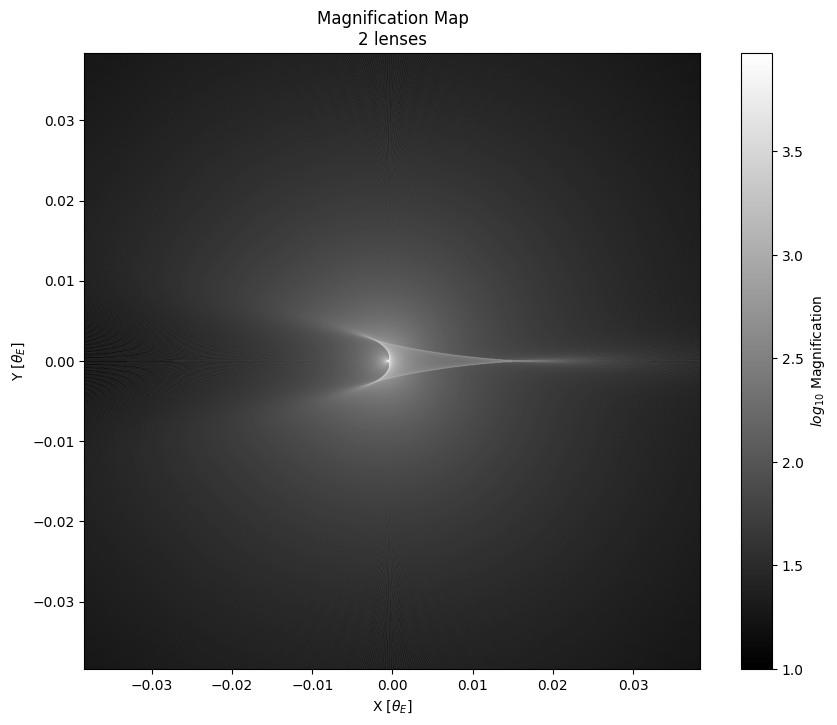

In [15]:
num_theta_2 = 3989
num_r_2 = 4*num_theta_2 + 4

param_dict_2 = {'pixels': 1000, 'ang_width': 'auto', 'lens_att': lens_att, 'thickness': 'auto', 'num_r': num_r_2, 'num_theta': num_theta_2}
mag_map_2 = IRSC.IRSCaustics(annulus_param_dict=param_dict_2)
magnifications_2 = mag_map_2.plot()

plt.show()

In [116]:
print(mag_map_1.stacked_mat.shape)
print(mag_map_2.stacked_mat.shape)

print(mag_map_1.repetitions)
print(mag_map_1.counts)

print(mag_map_2.repetitions)
print(mag_map_2.counts)

repeating = 0
for coordinate in mag_map_1.stacked_mat:
    if (coordinate == [999, 999]).all():
        repeating += 1

print(repeating)

(45929563, 2)
(45929563, 2)
[[  0   0]
 [  0 999]
 [  0   0]
 ...
 [  0   0]
 [  0 999]
 [  0   0]]
[1 1 1 ... 1 1 1]
[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [999 997]
 [999 998]
 [999 999]]
[21 20 17 ... 13 27 13]
13


In [14]:
arr = np.zeros(10, dtype=np.float64)
print(arr)

arr[0] = 1
arr[1] = 1.1
arr[2] = 0.9

print(arr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.  1.1 0.9 0.  0.  0.  0.  0.  0.  0. ]


In [159]:
def get_class_size(obj):
    total_size = sys.getsizeof(obj)
    for attribute_name in vars(obj):
        attribute = getattr(obj, attribute_name)
        total_size += sys.getsizeof(attribute)
    return total_size

print(get_class_size(mag_map_1) / 1e6)

2061.776256


In [30]:
pixels = 1000
delta = 0.1

ang_width, thickness, (y_plus, y_minus), points = IRSC.IRSCaustics.ang_width_thickness_calculator(lens_att)

u = 1.1 * ang_width / np.sqrt(2)
dx = ang_width / pixels

a_ann = (np.pi * (y_plus**2 - y_minus**2))
n_image = 1 / (A(u) * dx**2 * delta**2)

N_rays = n_image * a_ann

print(dx)
print(A(u))
print(a_ann)
print(f'{n_image:.2e}')
print(f'{N_rays:.2e}')
print(f'{np.sqrt(N_rays)/2:.2e}')

7.680319680319682e-05
16.761914327055635
0.3755177772343788
1.01e+09
3.80e+08
9.74e+03


In [ ]:
# mat = np.array([
#     [1, 0],
#     [0, 1],
#     [2, 1],
#     [2, 1]
# ])

# repetitions, counts = IRSC.IRSCaustics.calc_uniques(mag_map_1.stacked_mat)


# for i in range(len(repetitions)):
#     print(f'{repetitions[i]}: {values[i]}')

(22707743, 2)
